IBM SkillsBuild Data Analyst Case Study


Name: Roshan Parida


# Analysis of Sample SuperStore Dataset

Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Inspection

In [2]:
# Loading the dataset
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
# Finding unique values in each column
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [8]:
# Statistical Description of Data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [19]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [18]:
df.shape

(9977, 13)

In [34]:
df.corr()

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


Data Cleaning

In [10]:
# Checking missing values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Dropping a columns
df.drop(columns="Postal Code")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
df.drop_duplicates(keep= 'first', inplace=True)

1. Exploratory Data Analaysis and Visualization

1.1 Total Sales and Profits of company

In [11]:
Sales_and_Profits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2)

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\4082582822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sales_and_Profits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()


Sales     2296195.59
Profit     286241.42
dtype: float64

1.2 Top 10 States by Sales and Profit

In [12]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

In [13]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\2341193808.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


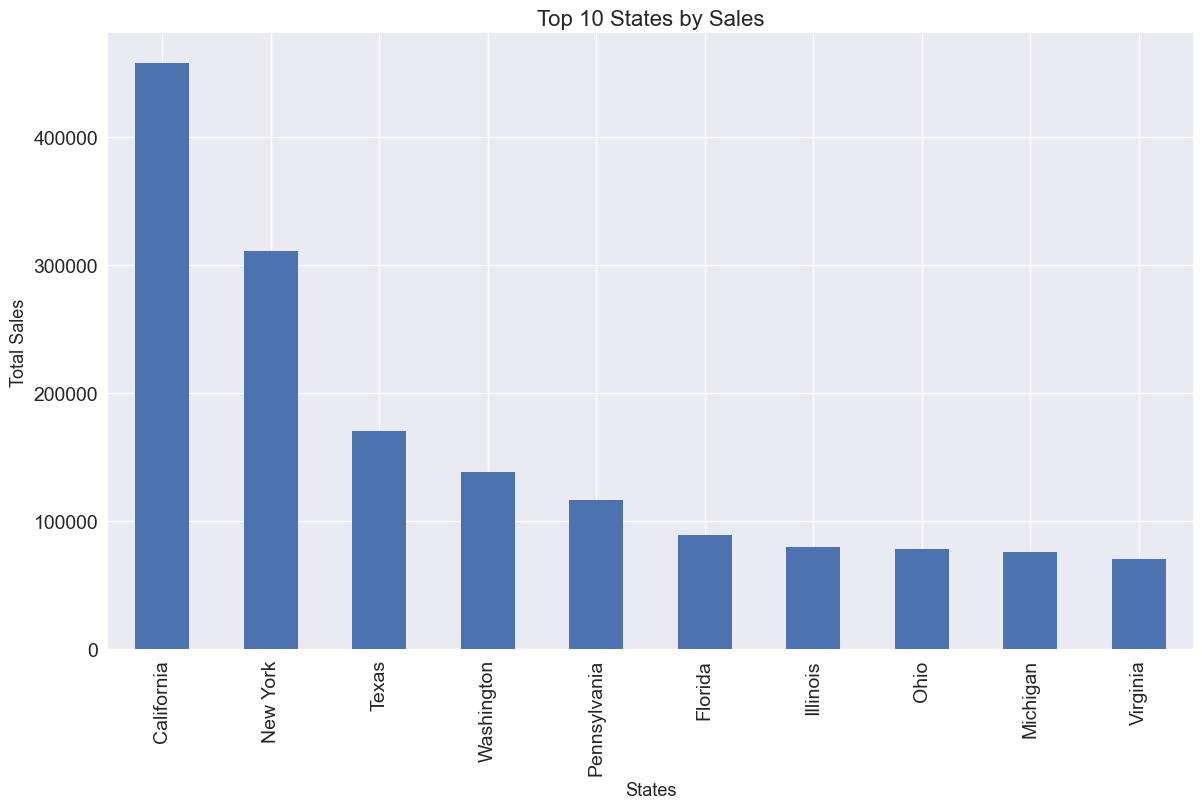

In [15]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

In [14]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\4247220716.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


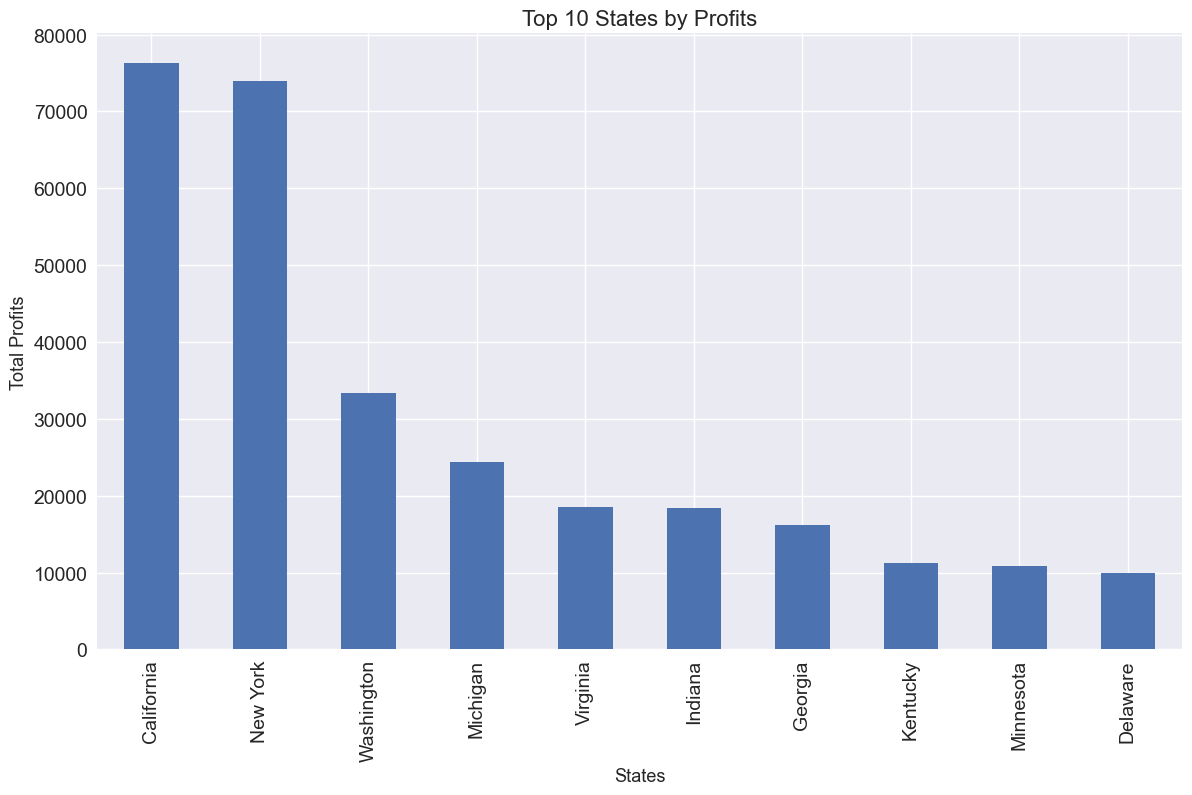

In [16]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

1.3 Sales and Profit Analysis and Visualization in different regions

In [33]:
sales_profit_segment1 = df.groupby('Region').sum()[['Sales', 'Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\128495873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_profit_segment1 = df.groupby('Region').sum()[['Sales', 'Profit']]


,Region,Sales,Profit
0,Central,500782.8528,39655.8752
1,East,678435.1960,91506.3092
2,South,391721.9050,46749.4303
3,West,725255.6365,108329.8079


<AxesSubplot: xlabel='Region'>

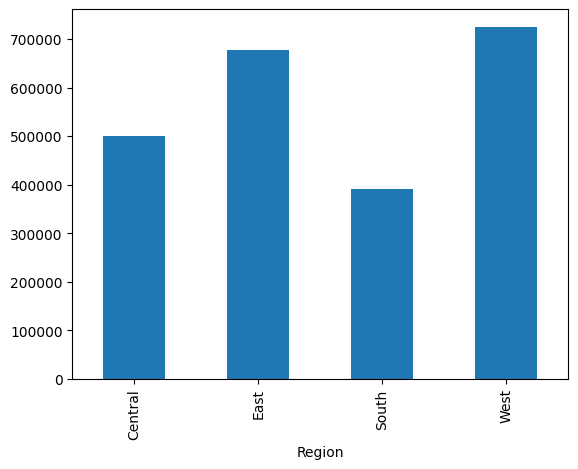

In [11]:
df.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='Region'>

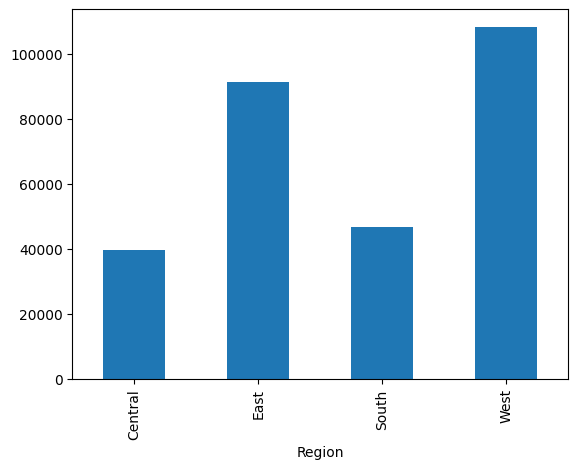

In [12]:
# Profit analysis based on region
df.groupby("Region")["Profit"].sum().plot.bar()

<AxesSubplot: ylabel='Sales'>

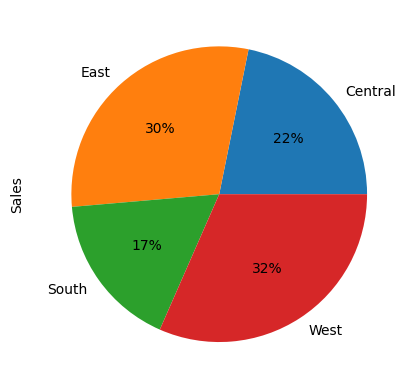

In [13]:
# Pie chart Visualization
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: ylabel='Profit'>

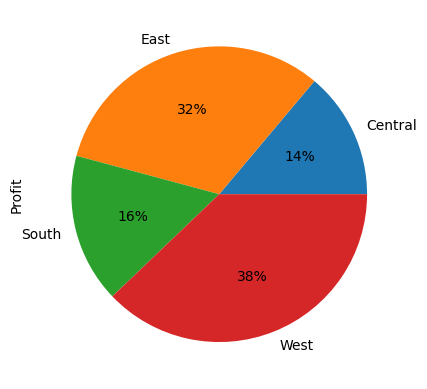

In [14]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

1.4 Sales and Profit Analysis and Visualization in different segments

In [32]:
sales_profit_segment1 = df.groupby('Segment').sum()[['Sales', 'Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\3409688315.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_profit_segment1 = df.groupby('Segment').sum()[['Sales', 'Profit']]


,Segment,Sales,Profit
0,Consumer,1.160833e+06,134007.4413
1,Corporate,7.060701e+05,91954.9798
2,Home Office,4.292927e+05,60279.0015


<AxesSubplot: xlabel='Segment'>

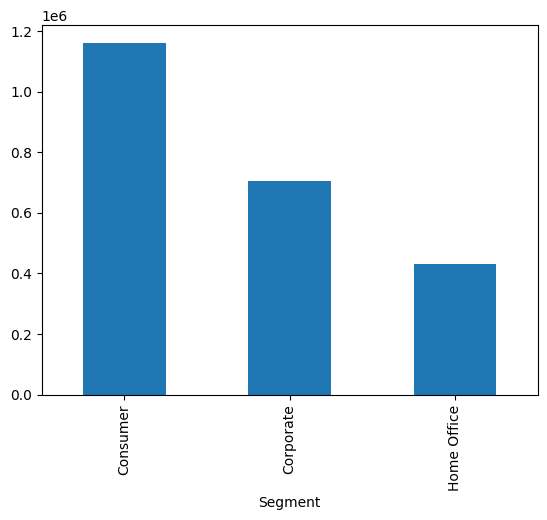

In [15]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='Segment'>

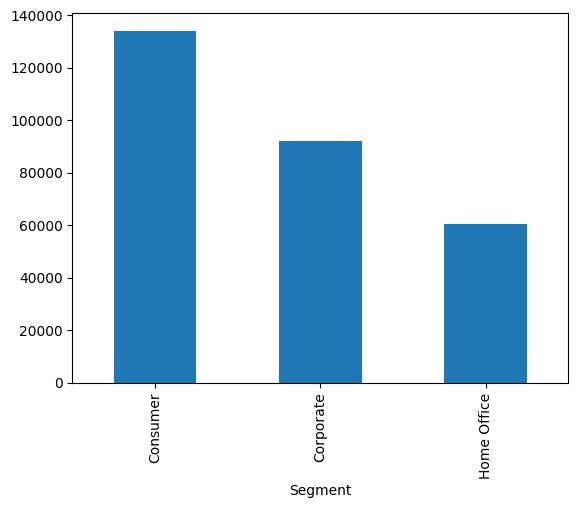

In [16]:
df.groupby("Segment")["Profit"].sum().plot.bar()

1.5 Sales and Profit Analysis and Visualization in different categories

In [29]:
sales_profit_segment1 = df.groupby('Category').sum()[['Sales', 'Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1724063214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_profit_segment1 = df.groupby('Category').sum()[['Sales', 'Profit']]


,Category,Sales,Profit
0,Furniture,741306.3133,18421.8137
1,Office Supplies,718735.2440,122364.6608
2,Technology,836154.0330,145454.9481


<AxesSubplot: xlabel='Category'>

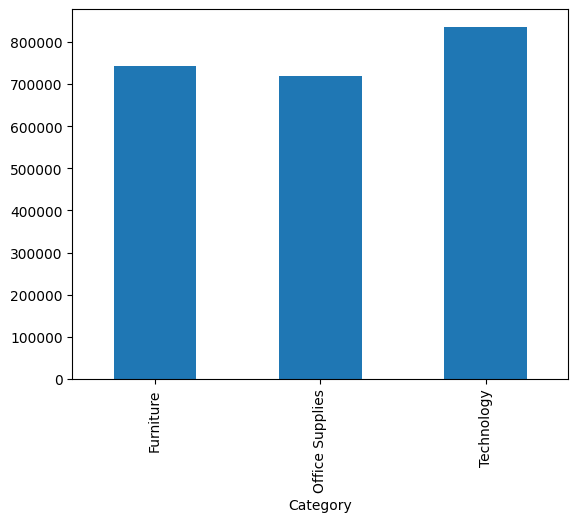

In [17]:
df.groupby("Category")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='Category'>

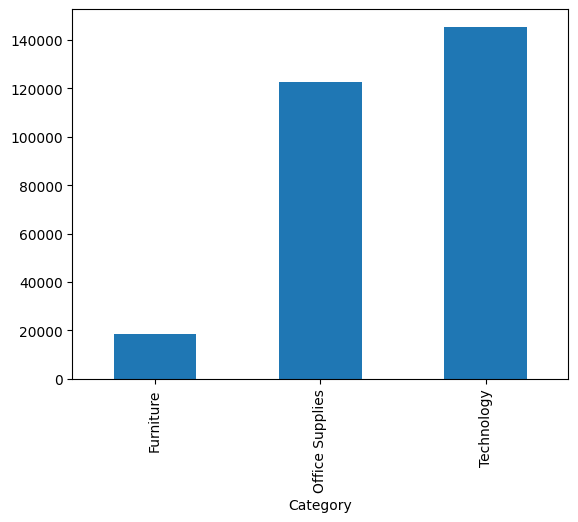

In [18]:
df.groupby("Category")["Profit"].sum().plot.bar()

<AxesSubplot: ylabel='Sales'>

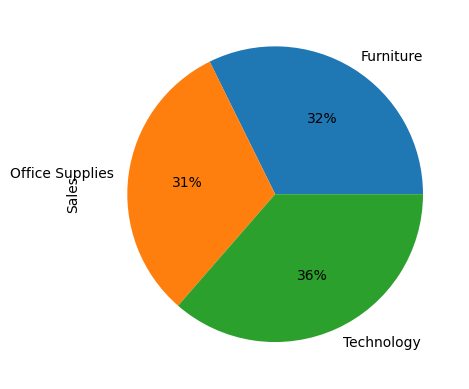

In [19]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: ylabel='Profit'>

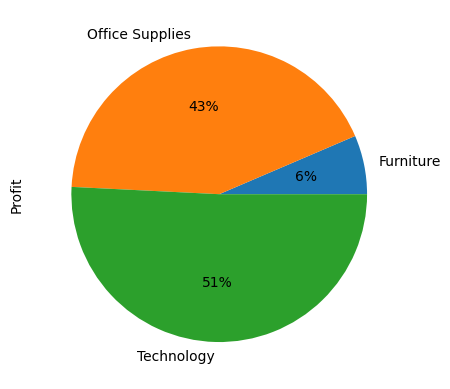

In [20]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

1.6 Sales and Profit Analysis and Visualization in different states.

In [31]:
sales_profit_segment1 = df.groupby('State').sum()[['Sales', 'Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1612877388.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_profit_segment1 = df.groupby('State').sum()[['Sales', 'Profit']]


,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457576.2715,76330.7891
4,Colorado,32108.1180,-6527.8579
5,Connecticut,13384.3570,3511.4918
6,Delaware,27451.0690,9977.3748
7,District of Columbia,2865.0200,1059.5893
8,Florida,89473.7080,-3399.3017
9,Georgia,49095.8400,16250.0433


<AxesSubplot: xlabel='State'>

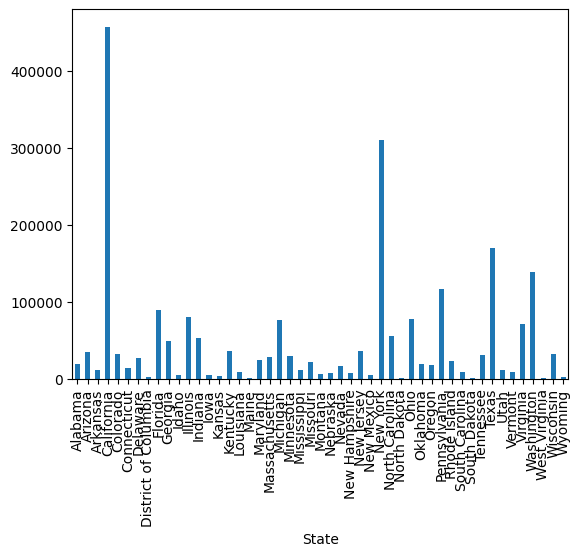

In [21]:
df.groupby("State")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='State'>

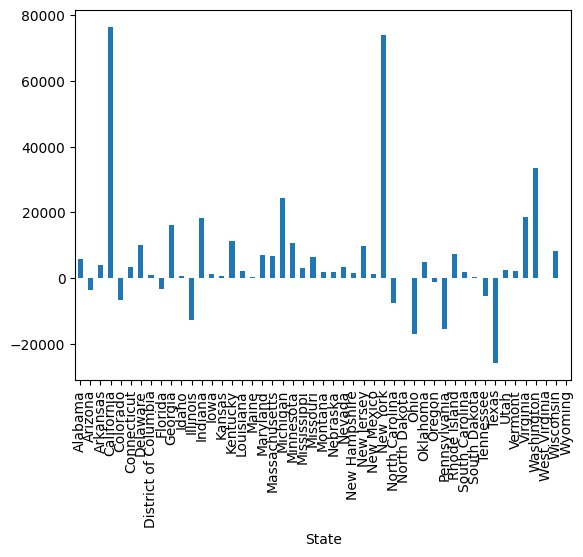

In [22]:
df.groupby("State")["Profit"].sum().plot.bar()

1.7 Quantities in different regions, categories, states, segments

In [35]:
quantity_segment1 = df.groupby('Region').sum()[['Quantity']]
quantity_segment1 = quantity_segment1.reset_index()
quantity_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1559914239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_segment1 = df.groupby('Region').sum()[['Quantity']]


,Region,Quantity
0,Central,8768
1,East,10609
2,South,6209
3,West,12234


<AxesSubplot: xlabel='Region'>

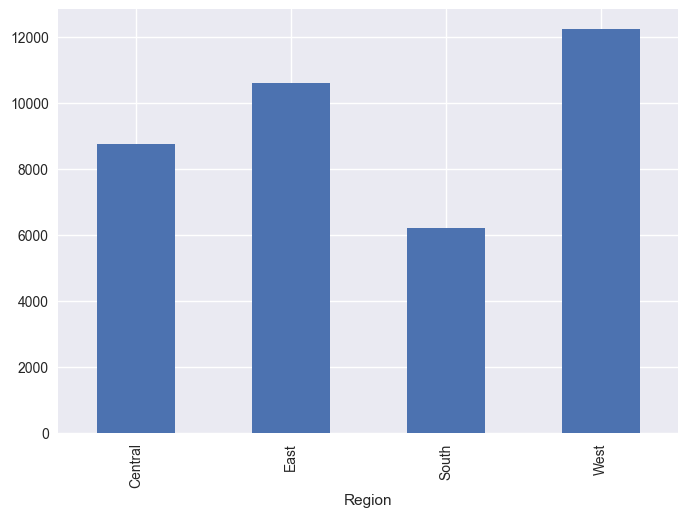

In [39]:
df.groupby("Region")["Quantity"].sum().plot.bar()

In [36]:
quantity_segment1 = df.groupby('Category').sum()[['Quantity']]
quantity_segment1 = quantity_segment1.reset_index()
quantity_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1659189498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_segment1 = df.groupby('Category').sum()[['Quantity']]


,Category,Quantity
0,Furniture,8020
1,Office Supplies,22861
2,Technology,6939


<AxesSubplot: xlabel='Category'>

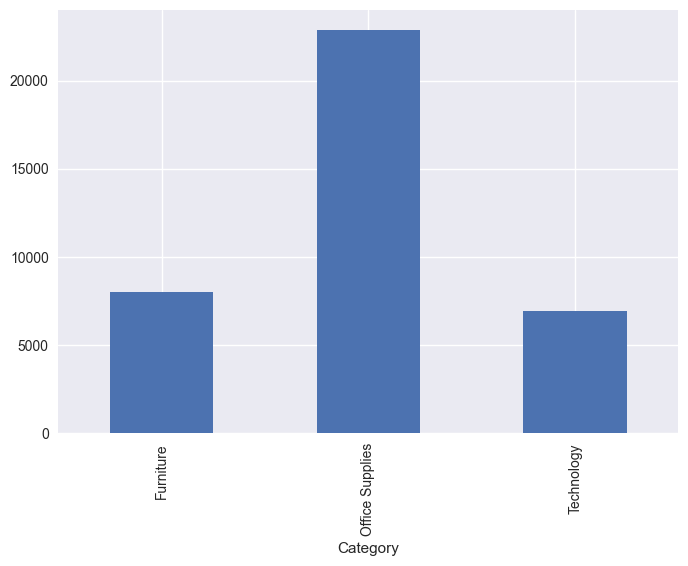

In [40]:
df.groupby("Category")["Quantity"].sum().plot.bar()

In [42]:
quantity_segment1 = df.groupby('State').sum()[['Quantity']]
quantity_segment1 = quantity_segment1.reset_index()
quantity_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\150690167.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_segment1 = df.groupby('State').sum()[['Quantity']]


,State,Quantity
0,Alabama,256
1,Arizona,862
2,Arkansas,240
3,California,7649
4,Colorado,693
5,Connecticut,281
6,Delaware,367
7,District of Columbia,40
8,Florida,1379
9,Georgia,705


<AxesSubplot: xlabel='State'>

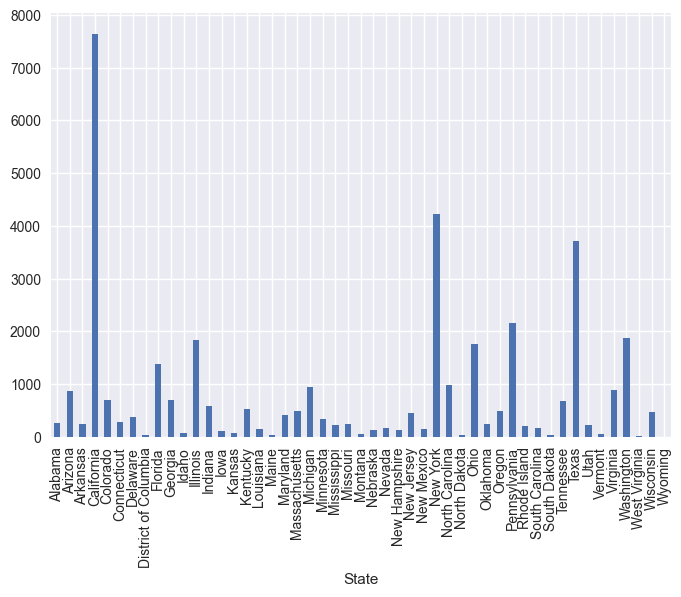

In [45]:
df.groupby("State")["Quantity"].sum().plot.bar()

In [43]:
quantity_segment1 = df.groupby('Segment').sum()[['Quantity']]
quantity_segment1 = quantity_segment1.reset_index()
quantity_segment1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1562732509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_segment1 = df.groupby('Segment').sum()[['Quantity']]


,Segment,Quantity
0,Consumer,19497
1,Corporate,11591
2,Home Office,6732


<AxesSubplot: xlabel='Segment'>

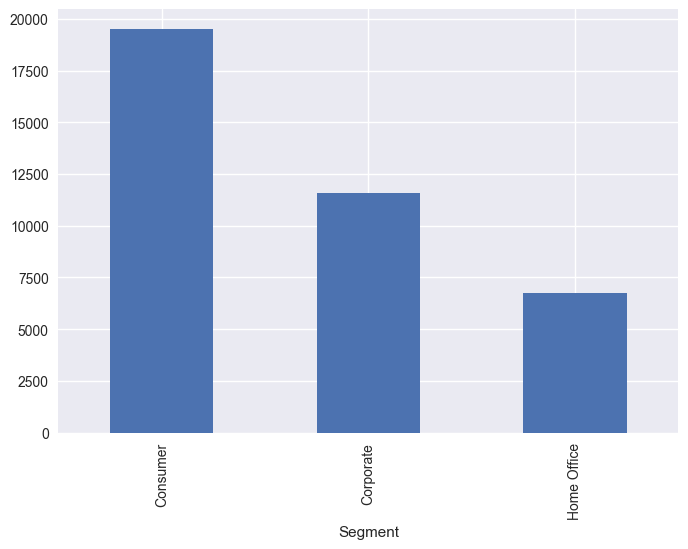

In [46]:
df.groupby("Segment")["Quantity"].sum().plot.bar()

1.8 Discount offered in different categories, states, segments

<AxesSubplot: xlabel='Category'>

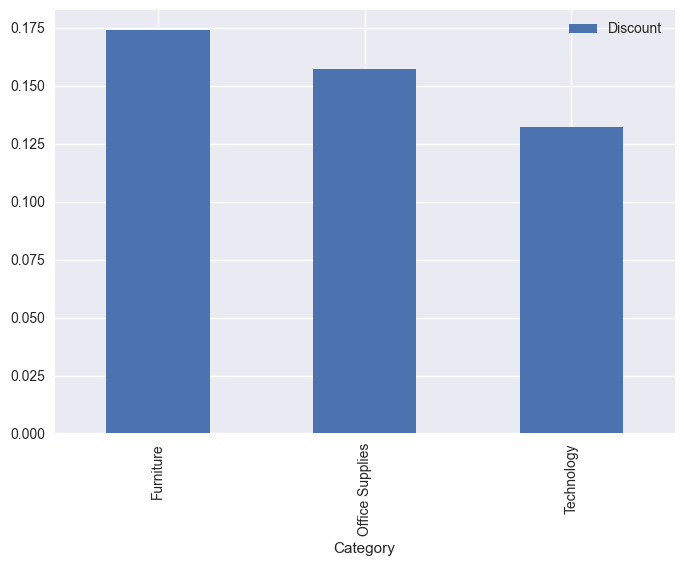

In [22]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot: xlabel='State'>

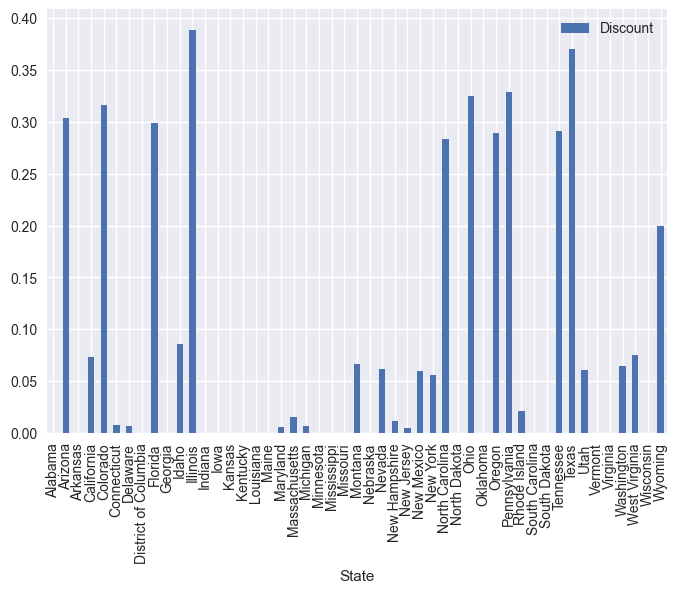

In [24]:
pivot=pd.pivot_table(df,index='State',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot: xlabel='Segment'>

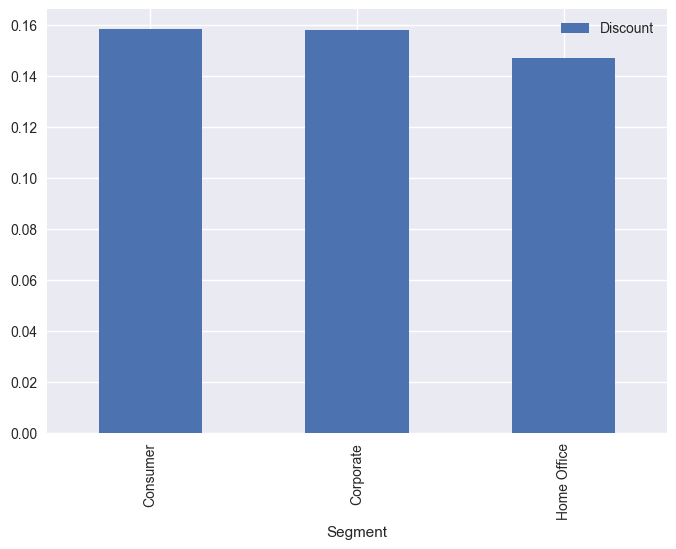

In [25]:
pivot=pd.pivot_table(df,index='Segment',values='Discount')
pivot.plot(kind='bar')

2. Data Visualization 

2.1 Based of Region

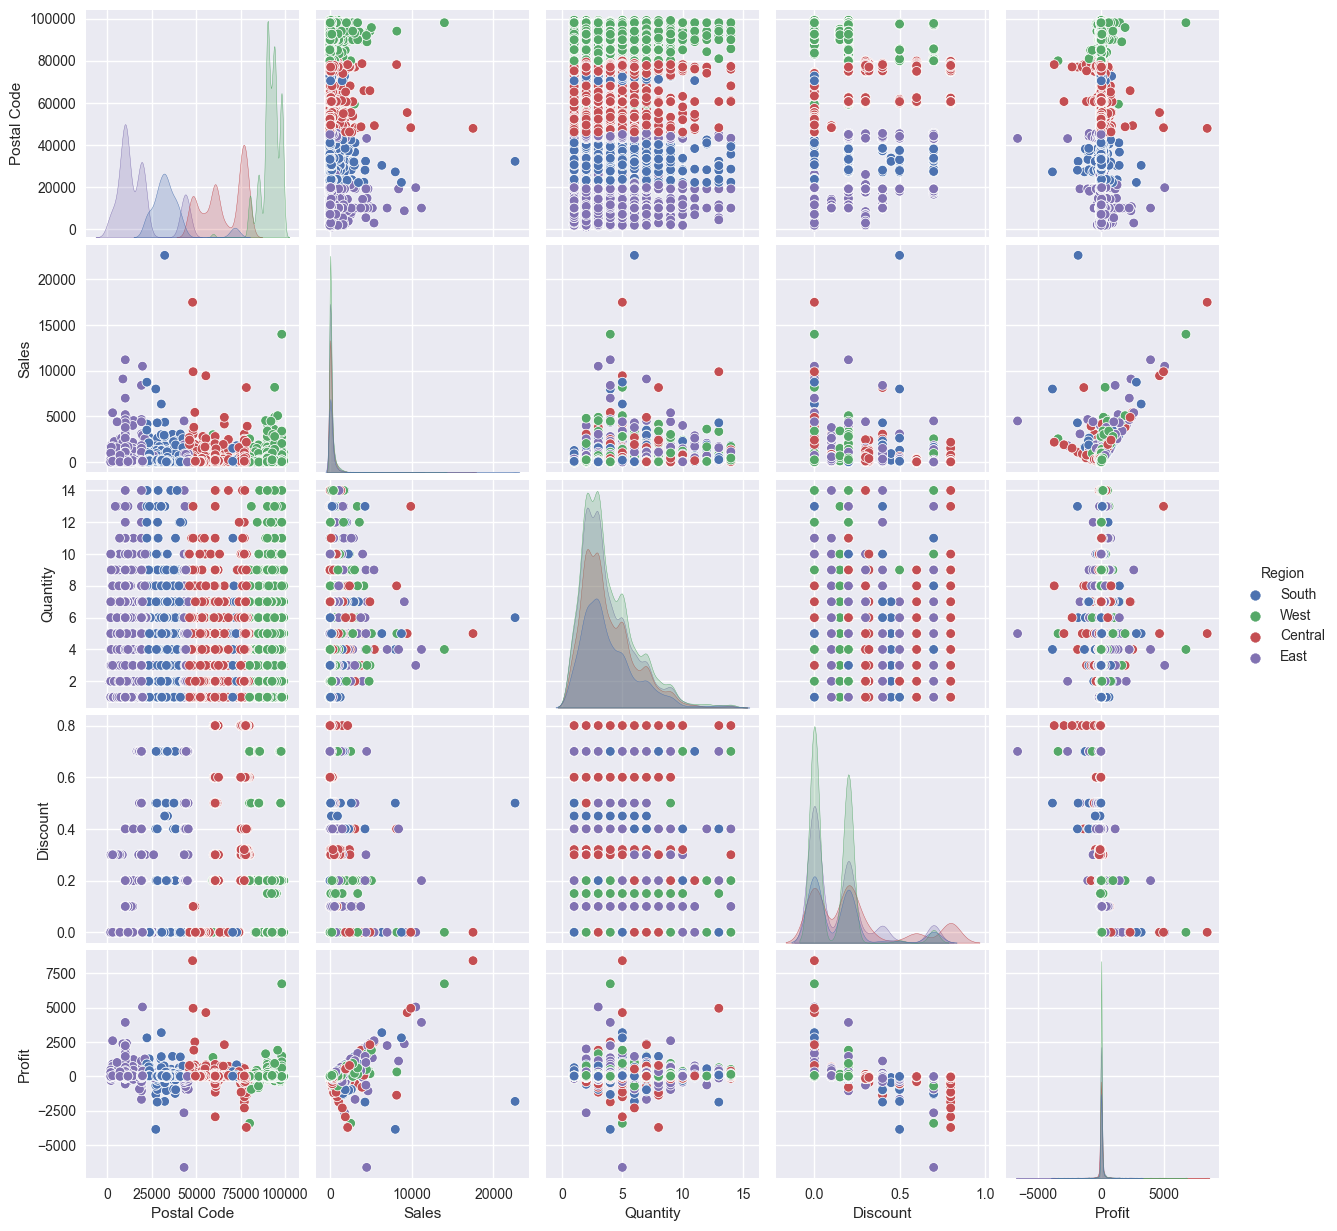

In [48]:
sns.pairplot(df, hue= "Region")

2.2 Based on Category

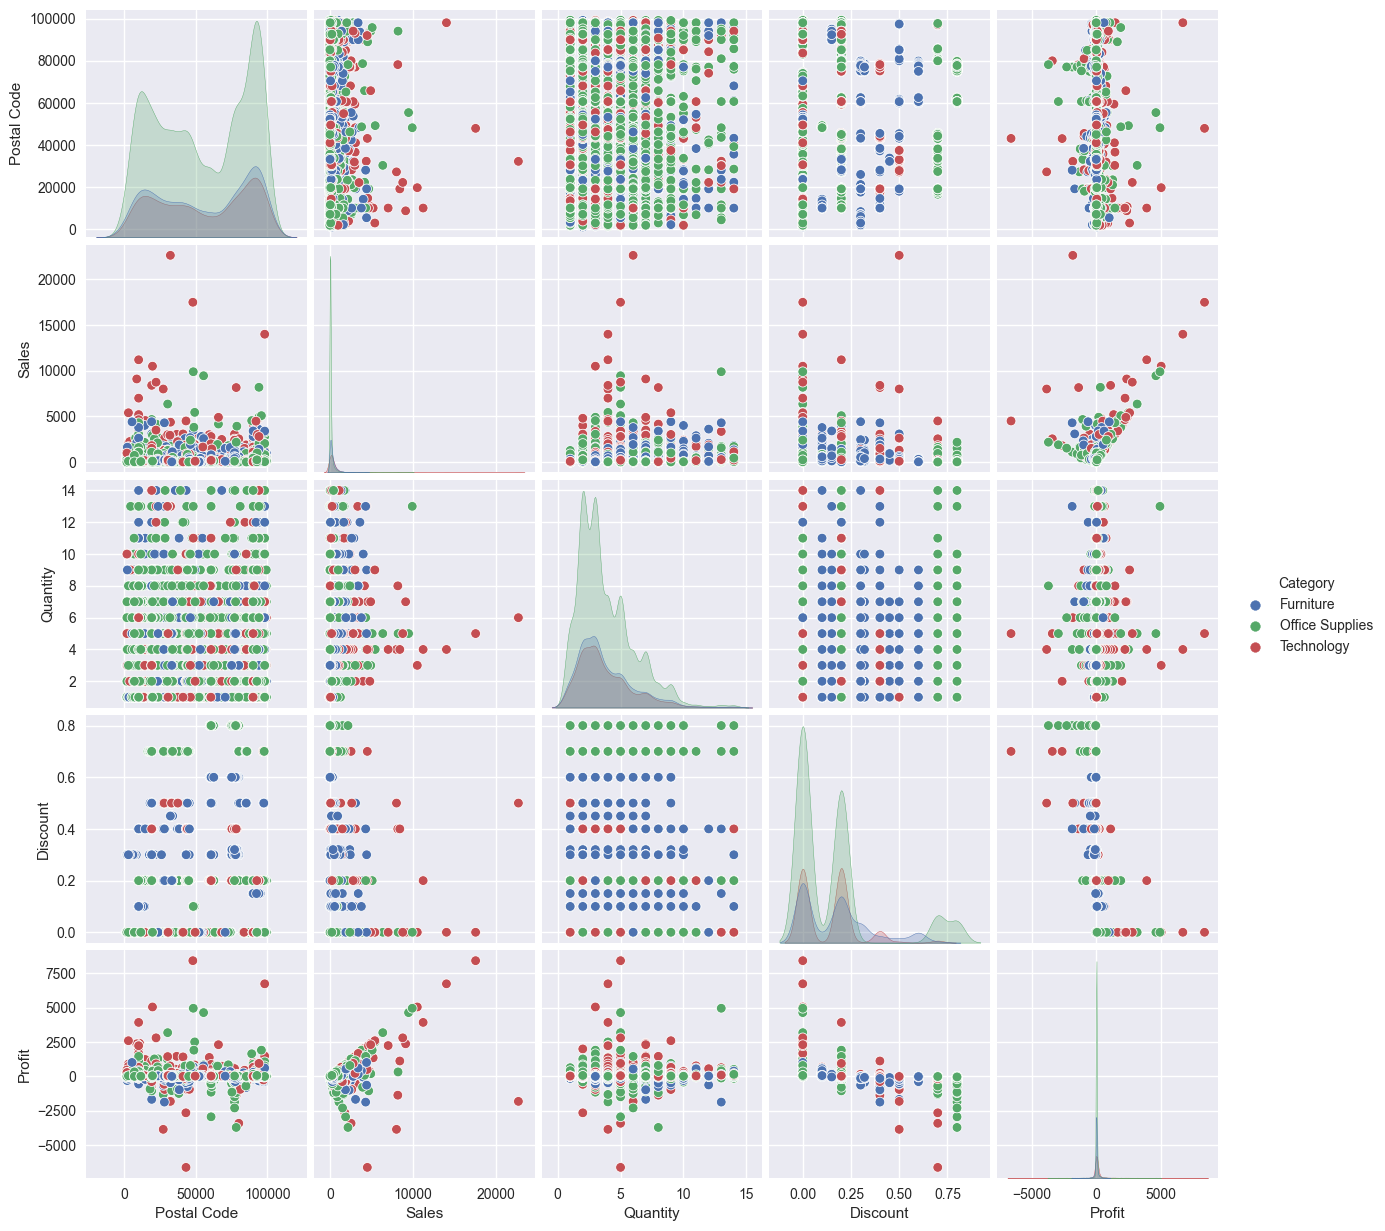

In [47]:
sns.pairplot(df, hue= "Category")

2.3 Based on Segment

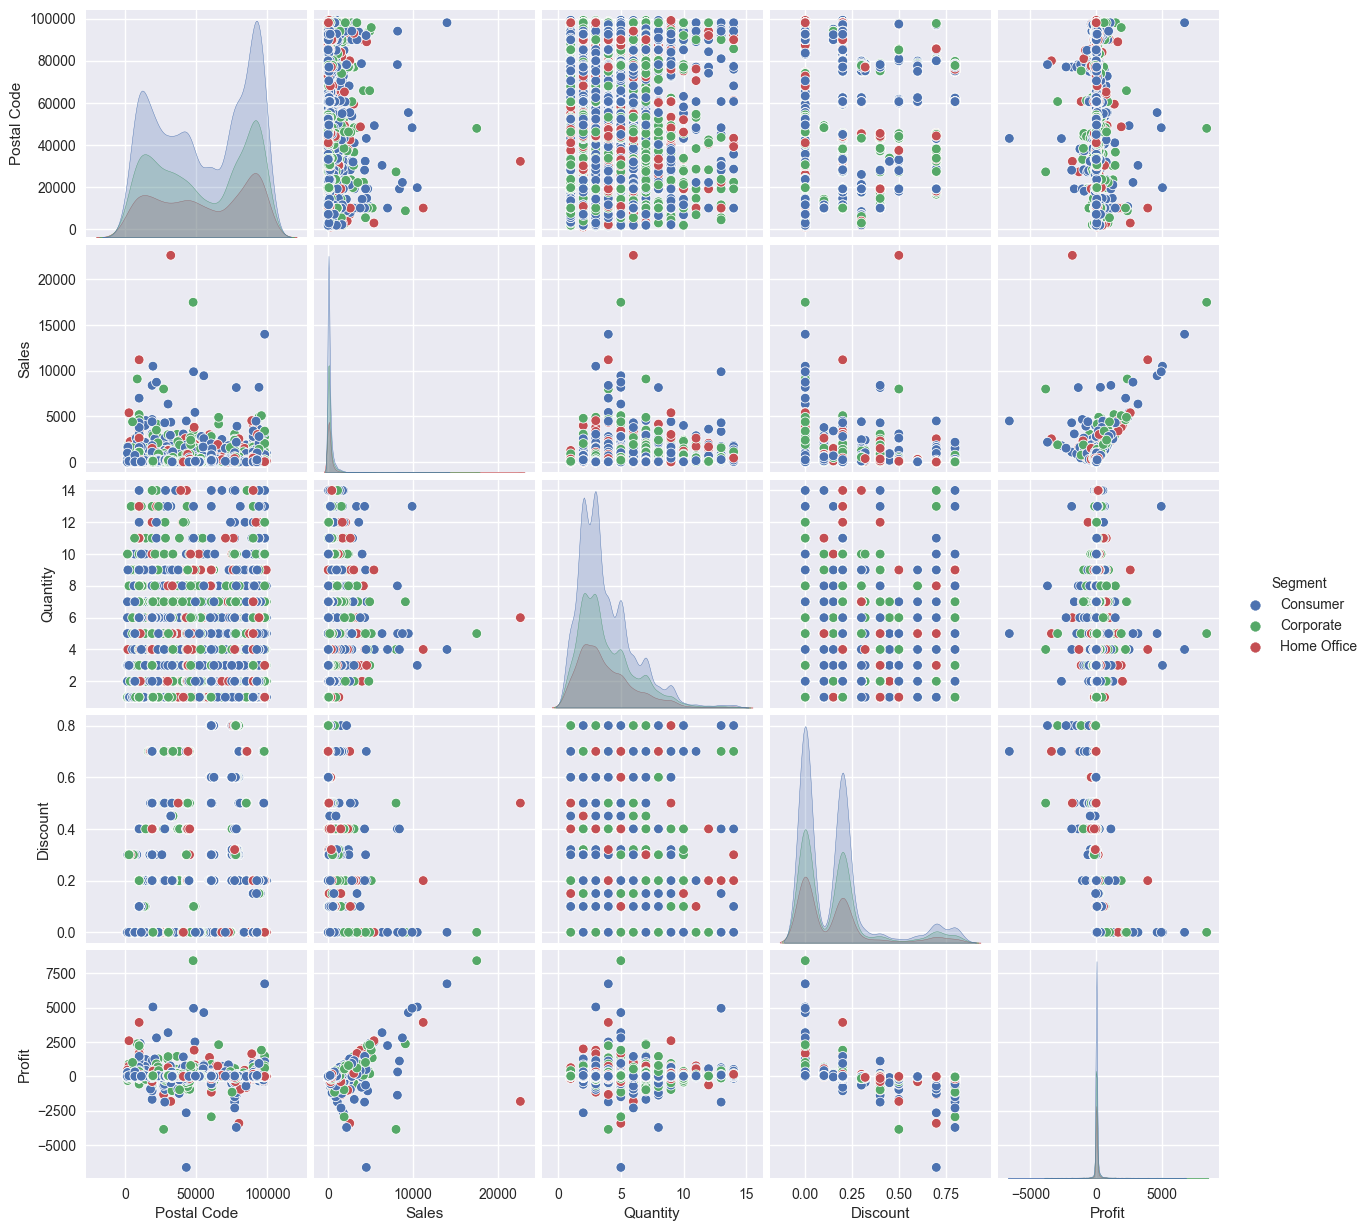

In [49]:
sns.pairplot(df, hue= "Segment")

2.4 Based on State

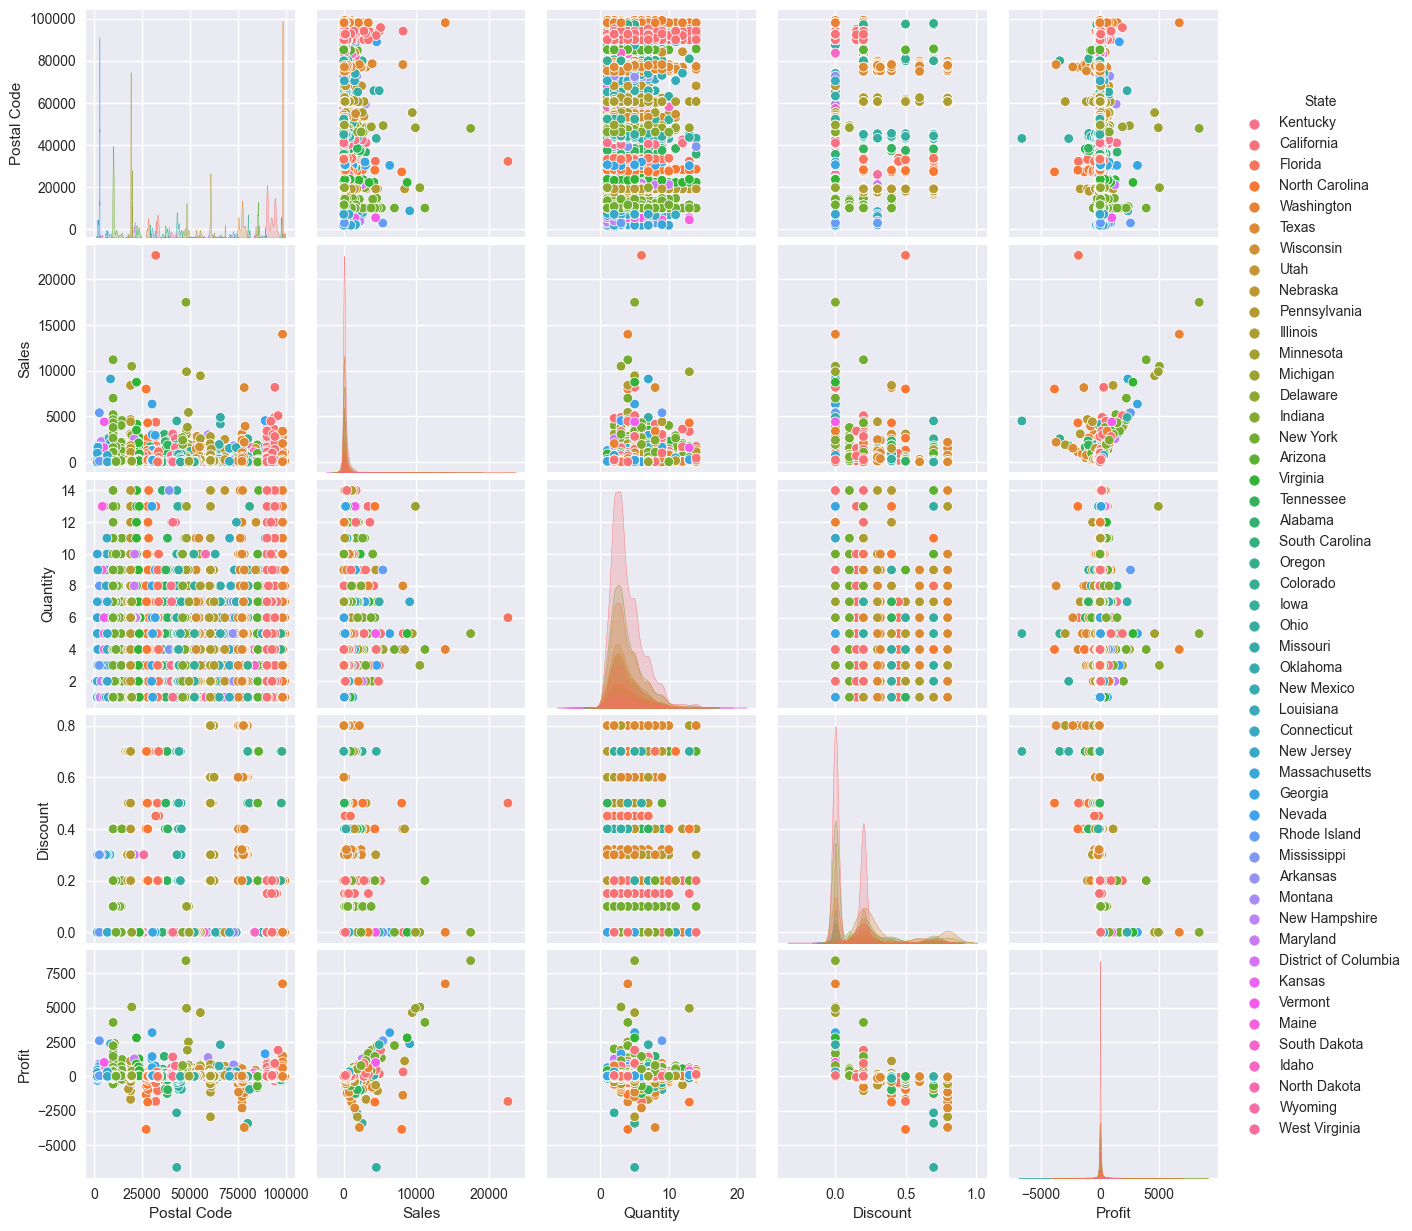

In [50]:
sns.pairplot(df, hue= "State")

3. Analysis and Visualization of different ship modes

3.1 Based on Sales

In [64]:
ship_mode1 = df.groupby('State').sum()[['Sales']]
ship_mode1 = ship_mode1.reset_index()
ship_mode1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1773465024.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ship_mode1 = df.groupby('State').sum()[['Sales']]


,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457576.2715
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


<AxesSubplot: xlabel='Ship Mode'>

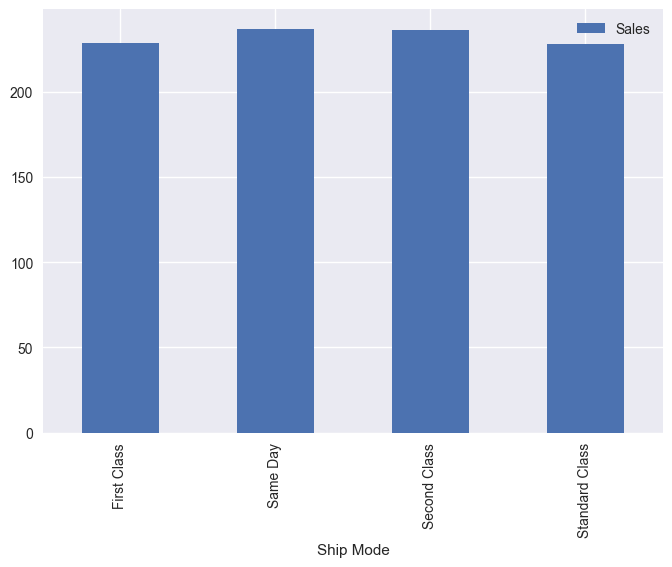

In [57]:
pivot=pd.pivot_table(df,index='Ship Mode',values='Sales')
pivot.plot(kind='bar')

3.2 Based on Profit

In [65]:
ship_mode1 = df.groupby('State').sum()[['Profit']]
ship_mode1 = ship_mode1.reset_index()
ship_mode1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\1116925454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ship_mode1 = df.groupby('State').sum()[['Profit']]


,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


<AxesSubplot: xlabel='Ship Mode'>

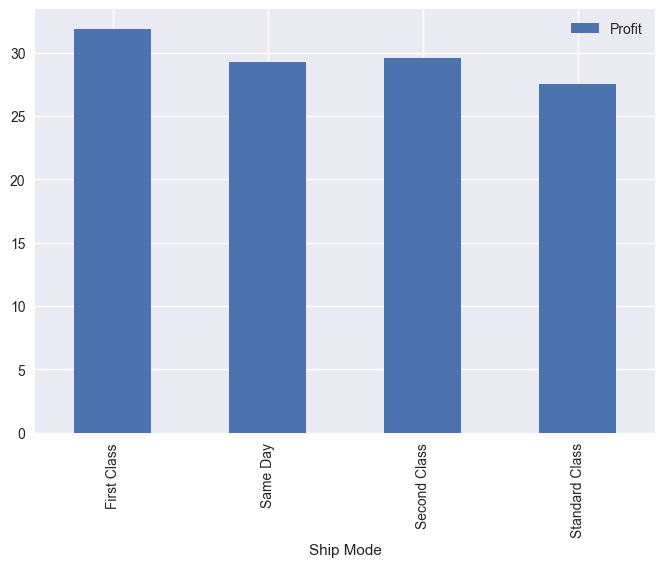

In [58]:
pivot=pd.pivot_table(df,index='Ship Mode',values='Profit')
pivot.plot(kind='bar')

3.3 Based on Quantity

In [66]:
ship_mode1 = df.groupby('State').sum()[['Quantity']]
ship_mode1 = ship_mode1.reset_index()
ship_mode1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\197712179.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ship_mode1 = df.groupby('State').sum()[['Quantity']]


,State,Quantity
0,Alabama,256
1,Arizona,862
2,Arkansas,240
3,California,7649
4,Colorado,693
5,Connecticut,281
6,Delaware,367
7,District of Columbia,40
8,Florida,1379
9,Georgia,705


<AxesSubplot: xlabel='Ship Mode'>

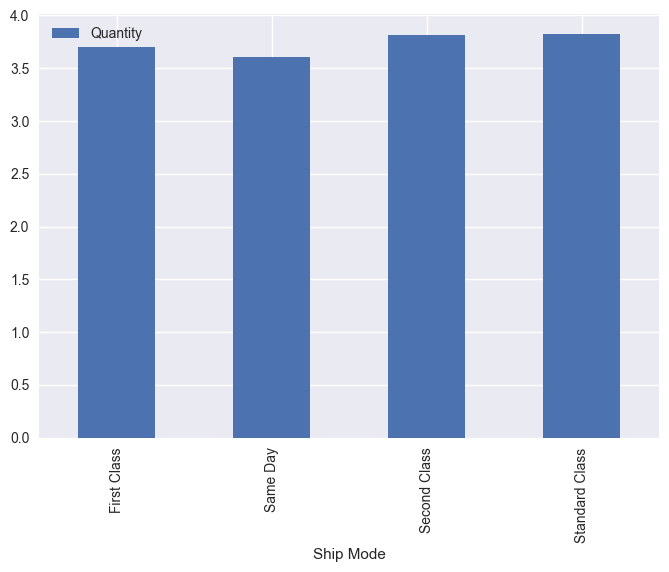

In [59]:
pivot=pd.pivot_table(df,index='Ship Mode',values='Quantity')
pivot.plot(kind='bar')

3.4 Based on Discount

In [67]:
ship_mode1 = df.groupby('State').sum()[['Discount']]
ship_mode1 = ship_mode1.reset_index()
ship_mode1

C:\Users\rosha\AppData\Local\Temp\ipykernel_1928\2299944365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ship_mode1 = df.groupby('State').sum()[['Discount']]


,State,Discount
0,Alabama,0.00
1,Arizona,68.00
2,Arkansas,0.00
3,California,145.60
4,Colorado,57.60
5,Connecticut,0.60
6,Delaware,0.60
7,District of Columbia,0.00
8,Florida,114.65
9,Georgia,0.00


<AxesSubplot: xlabel='Ship Mode'>

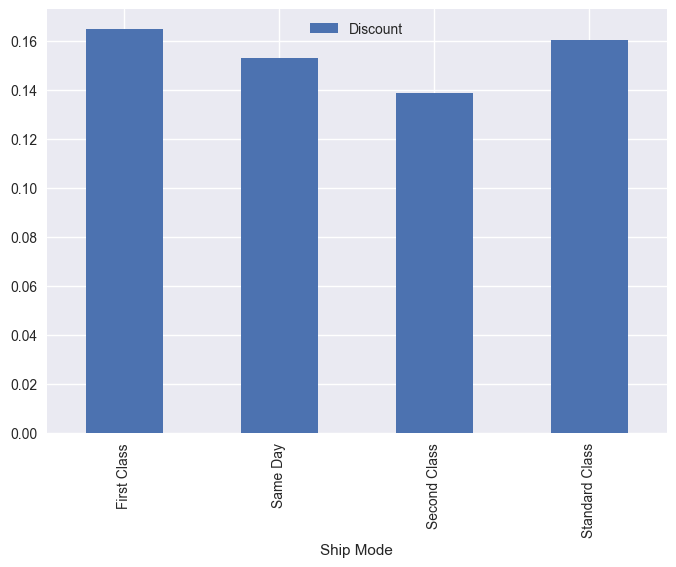

In [60]:
pivot=pd.pivot_table(df,index='Ship Mode',values='Discount')
pivot.plot(kind='bar')